# Genetic Algorithm Clustering

https://github.com/luthfishahab/geneticalgorithm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 10, 10,  0, 100, 100,  90, 90, 100, 100, 90, 90,  0,   0, 10,  10])
y = np.array([0,  0, 10, 10, 100,  90, 100, 90,   0,  10,  0, 10, 90, 100, 90, 100])

In [3]:
#distance
def distance(x, y):
    d = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(len(x))], dtype=int)
    
    return d

In [4]:
#fitness
def fitness(p, d):
    popFit = p.copy()
    popFit["Fitness"] = [sum(list(map(lambda x: sum(d[x]), p.iloc[i,:-1]))) for i in range(len(p))]
    
    return popFit

In [5]:
#create Population
def createPopulation(n_chrom, cluster, n_point, d):
    arr_pop = np.array([np.random.permutation(n_point)[:cluster] for i in range(n_chrom)])
    pop = pd.DataFrame(arr_pop)
    
    pop["Fitness"] = 0
    pop = fitness(pop, d)
    
    return pop

In [6]:
def n_and_m(pop):
    n = len(pop)
    m = len(pop.keys()) - 1 
    
    return n, m

In [7]:
#crossover
def Crossover(pop, d):
    popc = pop.copy()
    n,m = n_and_m(pop)
    
    for i in range(n):
        n1, n2 = np.random.permutation(n)[:2]
        idx = np.random.randint(0,m)
        
        p = list(pop.iloc[n1,:-1])
        q = list(pop.iloc[n2,:-1])
        
        if p[idx] in q:
            q.remove(p[idx])
            q.insert(idx,p[idx])
        else:
            q[idx] = p[idx]
        q.append(pop.iloc[n2,-1])
        
        popc.loc[i] = q
    
    popc = fitness(popc, d)
    
    return popc

In [8]:
#mutation
def Mutation(popc, d):
    popm = popc.copy()
    n,m = n_and_m(popc)
    
    for i in range(n):
        r = list(map(lambda x: x-1 if x!=0 else max(popc.iloc[i,:-1]), popc.iloc[i,:-1]))
        r.append(popc.iloc[i,-1])
        popm.loc[i] = r
    
    popm = fitness(popm, d)
    
    return popm

In [9]:
#combine Population
def combinePopulation(pop, popc, popm):
    n = len(pop)
    
    popAll = pop.copy()
    popAll = popAll.append(popc, ignore_index=True)
    popAll = popAll.append(popm, ignore_index=True)
    
    return popAll

In [10]:
#sort Population
def sort(popAll):
    popAll = popAll.sort_values(by=['Fitness'])
    popAll.index = range(len(popAll))
    
    popAll = popAll.drop_duplicates()
    popAll = popAll.head(n)

    return popAll

In [11]:
#predict Cluster
def predictCluster(chrom, n_point, dist):
    arr_index = np.arange(0, n_point)
    list_cluster = [np.array(list(map(lambda x: dist[x,idx], chrom))).argmin() for idx in arr_index]
    
    return list_cluster

In [12]:
#ploting
def plotSolution(x, y, cluster, Title=""):
    arr_index = np.arange(0, len(x))
    plt.figure(figsize=(10,5))
    sns.scatterplot(x, y , hue=cluster, style=cluster, s=150, palette="Set1", legend="full")
    
    plt.legend(title="Klaster")
    plt.title(Title)
    plt.show()

In [13]:
#main
def solveClustering(x, y, n_chrom=10, cluster=2, p_cross=1, p_mut=1, 
                                    generate=10, plot_step=False, step=1):
    

    d = distance(x, y)

    pop = createPopulation(n_chrom, cluster, len(x), d)
    print('Titik klaster pada populasi awal')
    print(pop.head(1))
    plotSolution(x, y, np.zeros(len(x), dtype=int), Title="Ploting Data Sebelum Klastering")
    print()

    for i in range(generate):
        pc = np.random.rand()
        pm = np.random.rand()

        popc = pop.copy()
        popm = pop.copy()

        if pc < p_cross:
            popc = Crossover(pop, d)

        if pm < p_mut:
            popm = Mutation(popc, d)

        pop = combinePopulation(pop, popc, popm)

        if plot_step and i%2 == 0:
            print('Titik klaster pada generasi ke',i)
            print(pop.head(1))
            list_cluster = predictCluster(pop.iloc[0,:-1], len(x), d)
            plotSolution(x, y, list_cluster, Title="Ploting Data Proses Klastering")

    print()
    print('Titik klaster terbaik pada populasi akhir')
    print(pop.head(1))
    list_cluster = predictCluster(pop.iloc[0,:-1], len(x), d)
    plotSolution(x, y, list_cluster, Title="Ploting Data Sesudah Klastering")

Titik klaster pada populasi awal
   0   1   2   3  Fitness
0  2  15  13  12     5050


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


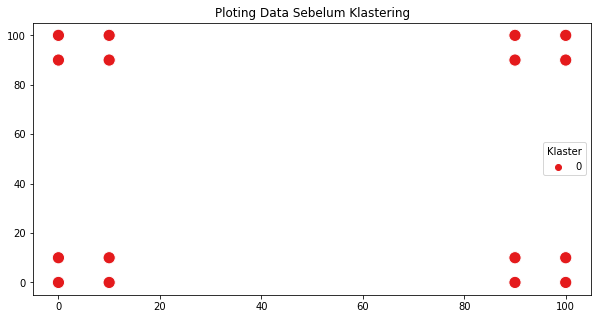


Titik klaster pada generasi ke 0
   0   1   2   3  Fitness
0  2  15  13  12     5050


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


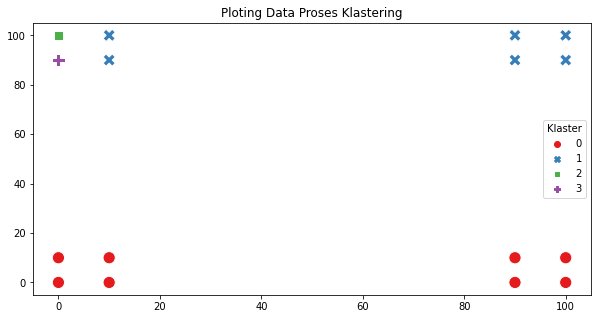

Titik klaster pada generasi ke 2
   0   1   2   3  Fitness
0  2  15  13  12     5050


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


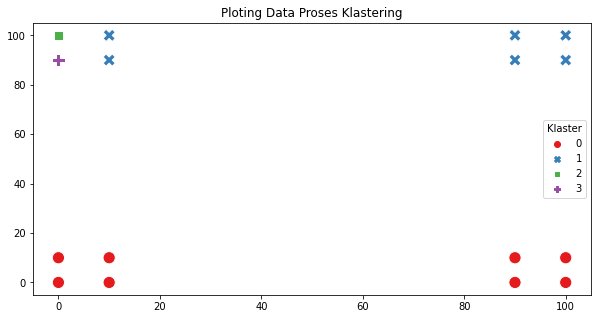

Titik klaster pada generasi ke 4
   0   1   2   3  Fitness
0  2  15  13  12     5050


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


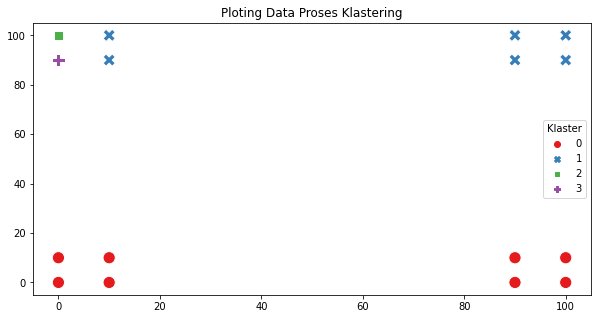

Titik klaster pada generasi ke 6
   0   1   2   3  Fitness
0  2  15  13  12     5050


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


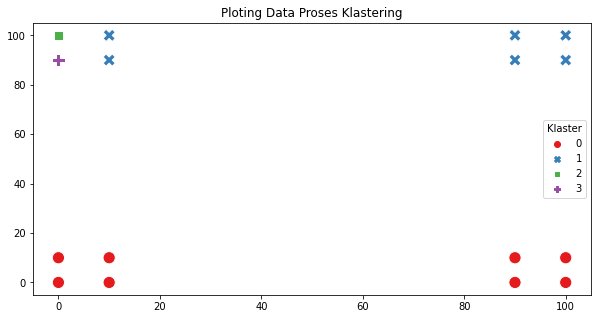

In [ ]:
solveClustering(x, y, n_chrom=10, cluster=4, generate=20, plot_step=True, step=4)